In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('nasik_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Eth-Benzene,MP-Xylene,O,WS,WD,SR,date,day,month,year
0,Nasik,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,...,9.01,25.81,NaN,1.96,165.97,623.42,2019-01-01,1,1,2019
1,Nasik,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,...,8.70,23.53,NaN,1.56,200.62,610.37,2019-02-01,2,1,2019
2,Nasik,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,...,8.13,22.68,NaN,1.70,170.23,586.97,2019-03-01,3,1,2019
3,Nasik,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,...,7.51,20.52,NaN,1.84,161.11,618.10,2019-04-01,4,1,2019
4,Nasik,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,...,4.78,13.85,NaN,1.77,194.58,521.27,2019-05-01,5,1,2019


In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City','O']
dt = data.drop(cols_to_drop,axis=1)
# print out the info of the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1517 non-null   float64       
 1   PM10         1521 non-null   float64       
 2   NO           1463 non-null   float64       
 3   NO2          1454 non-null   float64       
 4   NOx          1465 non-null   float64       
 5   NH3          1426 non-null   float64       
 6   SO2          1524 non-null   float64       
 7   CO           1526 non-null   float64       
 8   Ozone        1520 non-null   float64       
 9   Benzene      1514 non-null   float64       
 10  Toluene      1514 non-null   float64       
 11  Eth-Benzene  1509 non-null   float64       
 12  MP-Xylene    1464 non-null   float64       
 13  WS           1513 non-null   float64       
 14  WD           1513 non-null   float64       
 15  SR           1438 non-null   float64       
 16  date  

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(dt.duplicated().any()))
print('The total number of null values in each colum:')
display(dt.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5           34
PM10            30
NO              88
NO2             97
NOx             86
NH3            125
SO2             27
CO              25
Ozone           31
Benzene         37
Toluene         37
Eth-Benzene     42
MP-Xylene       87
WS              38
WD              38
SR             113
date             0
day              0
month            0
year             0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
dt.fillna(value=dt.mean(),inplace=True)
# let's check the data again if there are any missing values
dt.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Toluene        False
Eth-Benzene    False
MP-Xylene      False
WS             False
WD             False
SR             False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
dt.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,WS,WD,SR,date,day,month,year
0,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,12.65,48.62,9.01,25.81,1.96,165.97,623.42,2019-01-01,1,1,2019
1,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,9.89,43.00,8.70,23.53,1.56,200.62,610.37,2019-02-01,2,1,2019
2,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,10.44,41.86,8.13,22.68,1.70,170.23,586.97,2019-03-01,3,1,2019
3,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,10.15,38.43,7.51,20.52,1.84,161.11,618.10,2019-04-01,4,1,2019
4,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,7.60,27.04,4.78,13.85,1.77,194.58,521.27,2019-05-01,5,1,2019


In [7]:
def remove_outliers(df, n_std, dataset):
    """
    Removes outliers from a dataset using the z-score method.
    
    Parameters:
        data (array-like): The input dataset.
        n_std (float): The number of standard deviations from the mean to use as the threshold for identifying outliers.
    
    Returns:
        The input dataset with outliers removed.
    """
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    filtered_data = dataset[z_scores < n_std]
    return filtered_data

In [8]:
df = dt['PM2_5']
dataset = dt
data = remove_outliers(df, 3, dt)
print(data)

      PM2_5    PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0     69.82  112.90  29.52  69.90  60.61  18.84  11.29  1.79  57.32    12.65   
1     56.98  115.25  35.29  62.18  61.86  22.69   7.15  1.55  63.86     9.89   
2     62.25  102.40  21.63  64.80  52.68  24.03   9.56  1.50  50.19    10.44   
3     49.27   99.75  18.97  65.31  49.83  35.75  10.81  1.40  64.64    10.15   
4     43.93   83.52  14.01  51.42  39.85  37.71  10.77  1.23  64.95     7.60   
...     ...     ...    ...    ...    ...    ...    ...   ...    ...      ...   
1546  33.21   73.86   0.70   6.28   5.37   3.41   2.05  0.32  40.29     1.58   
1547  43.45   81.34   0.69   6.30   5.37   3.41   2.69  0.33  42.31     1.31   
1548  46.12   96.60   0.69   6.27   5.38   3.41   1.52  0.38  47.10     1.98   
1549  31.67   52.63   0.68   6.30   5.36   3.40   1.44  0.29  28.88     0.84   
1550  28.61   41.71   0.67   6.32   5.39   3.42   0.22  0.15  17.76     1.04   

      Toluene  Eth-Benzene  MP-Xylene  

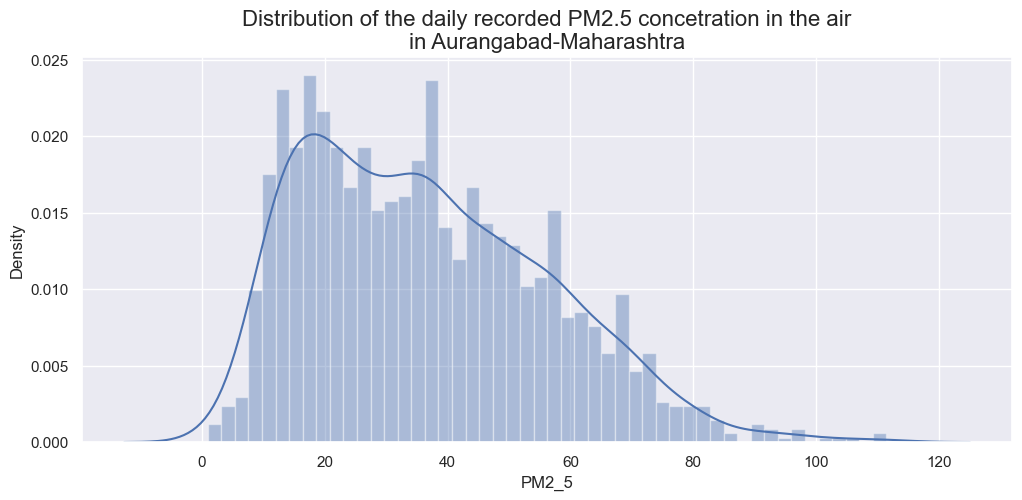

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2_5'],bins=50)
plt.title('Distribution of the daily recorded PM2.5 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM2_5']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM2_5'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM2_5']

# display the resulting DataFrame
print(monthly_average)

       median_PM2_5
month              
1              53.2
2              47.8
3              42.0
4              35.3
5              26.8
6              18.2
7              13.7
8              17.6
9              16.0
10             31.6
11             60.4
12             60.6


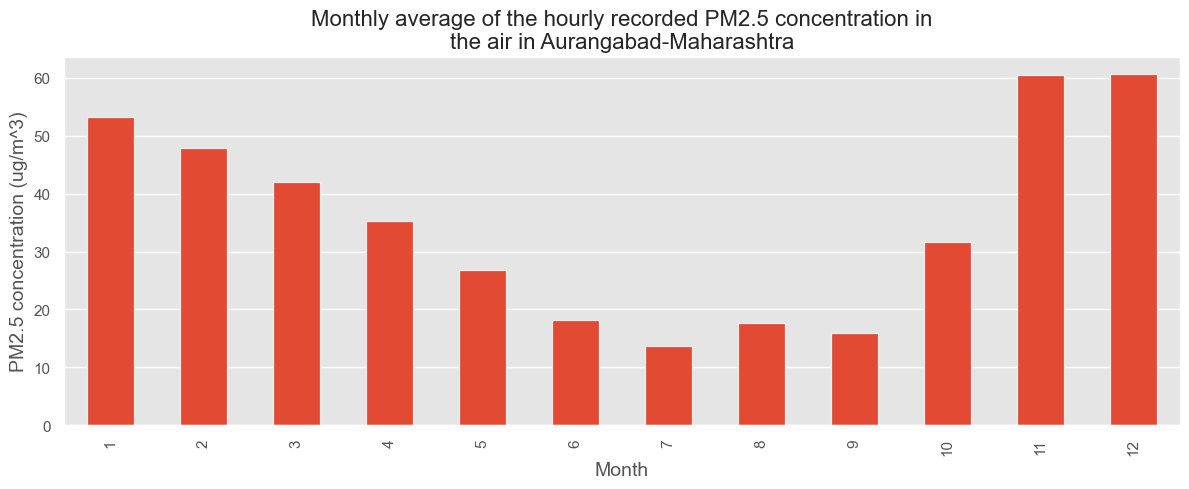

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

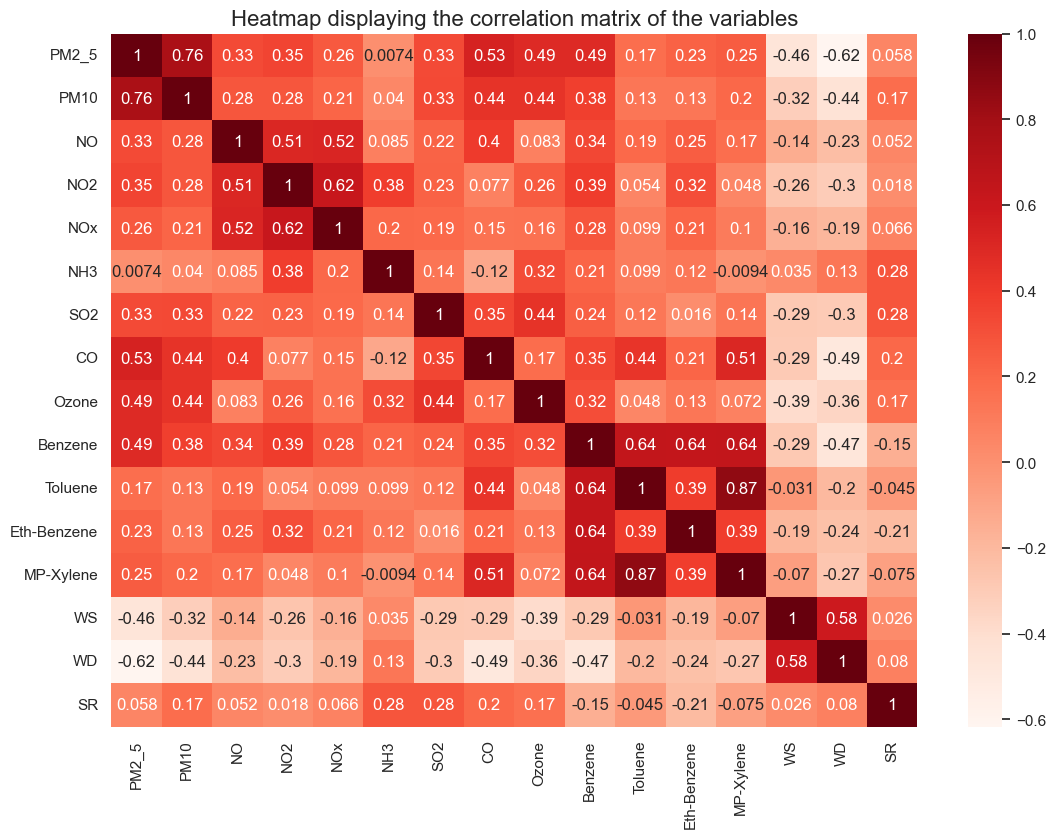

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Eth-Benzene','MP-Xylene','WS','WD','SR',]]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          88.926143
PM2_5           3.896242
PM10            2.568347
NO              1.935696
NO2             2.598200
NOx             1.801174
NH3             1.826990
SO2             1.525151
CO              2.859059
Ozone           1.908083
Benzene         4.410302
Toluene         4.747739
Eth-Benzene     1.893253
MP-Xylene       4.941270
WS              1.699959
WD              2.484426
SR              1.486225
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,WS,WD,SR
0,69.82,112.90,29.52,69.90,60.61,18.84,11.29,1.79,57.32,12.65,48.62,9.01,25.81,1.96,165.97,623.42
1,56.98,115.25,35.29,62.18,61.86,22.69,7.15,1.55,63.86,9.89,43.00,8.70,23.53,1.56,200.62,610.37
2,62.25,102.40,21.63,64.80,52.68,24.03,9.56,1.50,50.19,10.44,41.86,8.13,22.68,1.70,170.23,586.97
3,49.27,99.75,18.97,65.31,49.83,35.75,10.81,1.40,64.64,10.15,38.43,7.51,20.52,1.84,161.11,618.10
4,43.93,83.52,14.01,51.42,39.85,37.71,10.77,1.23,64.95,7.60,27.04,4.78,13.85,1.77,194.58,521.27


In [15]:
columns_to_drop = ['WS','WD','SR']
newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after

const          10.804479
PM2_5           3.693530
PM10            2.476372
NO              1.877406
NO2             2.430319
NOx             1.791072
NH3             1.475514
SO2             1.465250
CO              2.434396
Ozone           1.804892
Benzene         4.005645
Toluene         4.730448
Eth-Benzene     1.848035
MP-Xylene       4.874984
dtype: float64

In [16]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM2_5'] = np.log(newdata['PM2_5'])

In [17]:
mul_reg = formula.ols(formula="PM2_5 ~ PM10  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone +  Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     252.0
Date:                Wed, 19 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:38:46   Log-Likelihood:                -626.63
No. Observations:                1548   AIC:                             1279.
Df Residuals:                    1535   BIC:                             1349.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.2919      0.030     75.322      0.000       2.232       2.352
PM10            0.0076      0.000     22.685      0.000       0.007       0.008
NO             -0.0079      0.002     -3.648      0.000      -0.012      -0.004
NO2             0.0070      0.001      6.736      0.000       0.005       0.009
NOx             0.0002      0.001      0.265      0.791      -0.001       0.002
NH3            -0.0082      0.001     -7.242      0.000      -0.010      -0.006
SO2            -0.0078      0.004     -2.086      0.037      -0.015      -0.000
CO              0.3877      0.039      9.912      0.000       0.311       0.464
Ozone           0.0087      0.001     14.264      0.000       0.008       0.010
Benzene         0.0782      0.008      9.736      0.000       0.062       0.094
Toluene        -0.0086      0.002     -3.660      0.000      -0.013      -0.004
Eth_Benzene    -0.0127      0.004     -2.859      0.004      -0.021      -0.004
MP_Xylene      -0.0057      0.003     -1.689      0.091      -0.012       0.001
==============================================================================
Omnibus:                      878.238   Durbin-Watson:                   0.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13430.767
Skew:                          -2.323   Prob(JB):                         0.00
Kurtosis:                      16.662   Cond. No.                         415.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM2_5',axis=1)
y = newdata['PM2_5']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,1.300952,4.313384,3.562069,2.852646,0.727429,2.570769,3.507471,0.792588,4.877493,4.729943,2.565514,3.651545
1,1.366454,5.302774,2.997396,2.930647,1.122438,1.177268,2.802645,1.125558,3.609509,4.070392,2.455720,3.272910
2,1.008282,2.960475,3.189034,2.357806,1.259921,1.988461,2.655806,0.429580,3.862187,3.936605,2.253840,3.131753
3,0.934418,2.504361,3.226337,2.179964,2.462389,2.409204,2.362128,1.165270,3.728957,3.534068,2.034251,2.773046
4,0.482034,1.653862,2.210365,1.557203,2.663484,2.395740,1.862876,1.181053,2.557450,2.197364,1.067352,1.665374


In [19]:
y.head()

0    4.245921
1    4.042700
2    4.131159
3    3.897315
4    3.782597
Name: PM2_5, dtype: float64

In [20]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [21]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.6575402068553431

Score on test data: 0.6738863968072503


In [22]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.11927325973409977

Overall model accuracy: 0.6738863968072503


In [23]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM2_5',axis=1)
y = ensemble_data['PM2_5']

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

In [25]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [26]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.8624299633093938

Score on test data: 0.7600649404546104

Root Mean Squared Error: 9.454472236029478

Overall model accuracy: 0.7600649404546104


In [27]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [28]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.8497880426193712

Score on test data: 0.7594731841405827

Best parameters found:


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 2}

Root Mean Squared Error: 9.4661239268959

Overall model accuracy: 0.7594731841405827


In [29]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree.xlsx')

In [30]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [31]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.9232245294751182

Score on test data: 0.8192963410899629

Root Mean Squared Error: 8.204911630315792

Overall model accuracy: 0.8192963410899629


In [32]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.9120219476105162

Score on test data: 0.8179644483686934

Best parameters found:


{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 6}

Root Mean Squared Error: 8.235093640590483

Overall model accuracy: 0.8179644483686934


In [34]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest.xlsx')

In [35]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [36]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9969146751396687

Score on test data: 0.8071946815713759

Root Mean Squared Error: 8.475199686352264

Overall model accuracy: 0.8071946815713759


In [37]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [38]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9999995645663502

Score on test data: 0.8245579611487084

Best parameters found:


{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 6,
 'learning_rate': 0.2}

Root Mean Squared Error: 8.084576364931477

Overall model accuracy: 0.8245579611487084


In [39]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost.xlsx')

In [40]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1548 1548
